In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mastcasjobs

In [36]:
query = """SELECT o.objID, o.raMean, o.decMean, o.ndetections,
        o.ng, o.nr, o.ni, o.nz, o.ny, o.gMeanPSFMag, 
        o.rMeanPSFMag,o.iMeanPSFMag,o.zMeanPSFMag,o.yMeanPSFMag
        FROM fGetNearbyObjEq(187.706, 12.391, 500.0/60.0) AS nb
        INNER JOIN MeanObjectView As o ON o.objID = nb.objID
        WHERE o.ng > 0 AND o.nr > 0 AND o.ni > 0 AND o.nz > 0 AND o.ny > 0
        """

jobs = mastcasjobs.MastCasJobs(context = "PanSTARRS_DR2")
results = jobs.quick(query, task_name = "python API trial")
print(results)

      objID             raMean          decMean      ... zMeanPSFMag yMeanPSFMag
------------------ ---------------- ---------------- ... ----------- -----------
122701877200608175 187.720027144071 12.2564303134365 ...     20.5476     20.2091
122711876633224468 187.663112516315 12.2617966712767 ...     20.6877     20.2507
122711876646985002 187.664636201198 12.2621467490952 ...      20.684     19.6261
122711876949081161 187.694893741891 12.2589266477693 ...     19.4972     19.4171
122711876968586563 187.696832242629 12.2634122745492 ...     18.3202     18.2143
122711876997071732 187.699563359975 12.2593902128606 ...     20.7485     19.9749
122711877006631787 187.700680021549 12.2593836774911 ...      21.322     20.3937
122711877233200081 187.723297504998  12.258009064748 ...     20.6002     20.2602
122711877313352371 187.731294229441 12.2598963752644 ...     20.1961     19.9747
122711877337087012  187.73368466986 12.2637913751606 ...     19.6103     19.3324
               ...          

In [38]:
data = results[1,2,9,10]
print(data)

ValueError: Illegal type <class 'tuple'> for table item access

In [30]:
xvalues = data[:,0] - np.average(data[:,0])
yvalues = data[:,1] - np.average(data[:,1])
psf_lum_values = data[:,2]
kron_lum_values = data[:,3]

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype([('objID', '<i8'), ('raMean', '<f8'), ('decMean', '<f8'), ('nDetections', '<i8'), ('ng', '<i8'), ('nr', '<i8'), ('ni', '<i8'), ('nz', '<i8'), ('ny', '<i8'), ('gMeanPSFMag', '<f8'), ('rMeanPSFMag', '<f8'), ('iMeanPSFMag', '<f8'), ('zMeanPSFMag', '<f8'), ('yMeanPSFMag', '<f8')]), dtype([('objID', '<i8'), ('raMean', '<f8'), ('decMean', '<f8'), ('nDetections', '<i8'), ('ng', '<i8'), ('nr', '<i8'), ('ni', '<i8'), ('nz', '<i8'), ('ny', '<i8'), ('gMeanPSFMag', '<f8'), ('rMeanPSFMag', '<f8'), ('iMeanPSFMag', '<f8'), ('zMeanPSFMag', '<f8'), ('yMeanPSFMag', '<f8')])) -> None

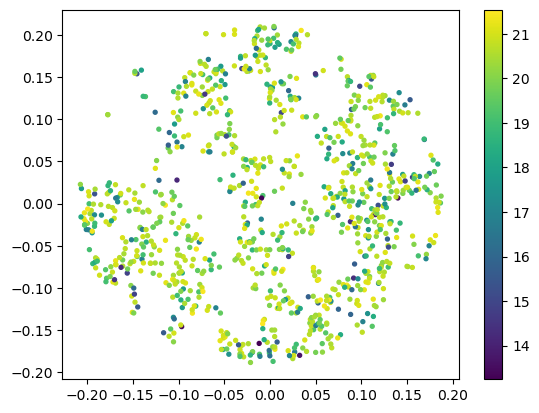

In [28]:
plt.scatter(xvalues, yvalues, s = 8, c = psf_lum_values)
plt.colorbar()

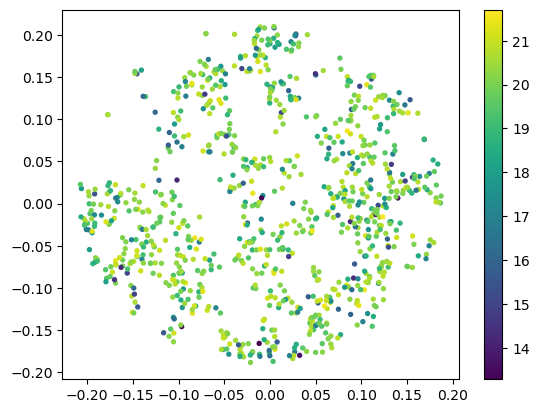

In [5]:
right_pos = np.where(kron_lum_values != -999)
plt.scatter(xvalues[right_pos], yvalues[right_pos], s = 8, c = kron_lum_values[right_pos])
plt.colorbar()

In [ ]:
jobs = 